### Breast cancer, while prevalent among women, remains a crucial issue demanding vigilance. Recognizing potential symptoms like lumps, nipple changes, or skin alterations is the first step. Regular screenings, primarily mammograms and clinical exams, play a vital role in early detection. If abnormalities arise, further investigation through biopsies confirms or rules out cancer, ultimately leading to diagnosis. Staging then determines the cancer's extent, guiding treatment options like surgery, radiation, or chemotherapy. Remember, early detection significantly improves prognosis, emphasizing the importance of awareness and proactive healthcare measures. Consult a healthcare professional if you have concerns, and remember, reliable sources like the American Cancer Society and National Cancer Institute offer invaluable support and information.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv(r"C:\Users\johnm\OneDrive\Desktop\archive (23).zip")
df.head()         

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Explore the Data

In [7]:
df.shape

(569, 33)

In [8]:
df = df.drop('id', axis = 1)
df = df.drop('Unnamed: 32', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
# We need the algorythm to understand Maligmant and Benign by using binary code; 0 for Benign and 1 for Malignant
le = LabelEncoder()

df['diagnosis']= le.fit_transform(df['diagnosis'])
  
df['diagnosis'].unique()

array([1, 0])

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Utilize Graphs to further explore data

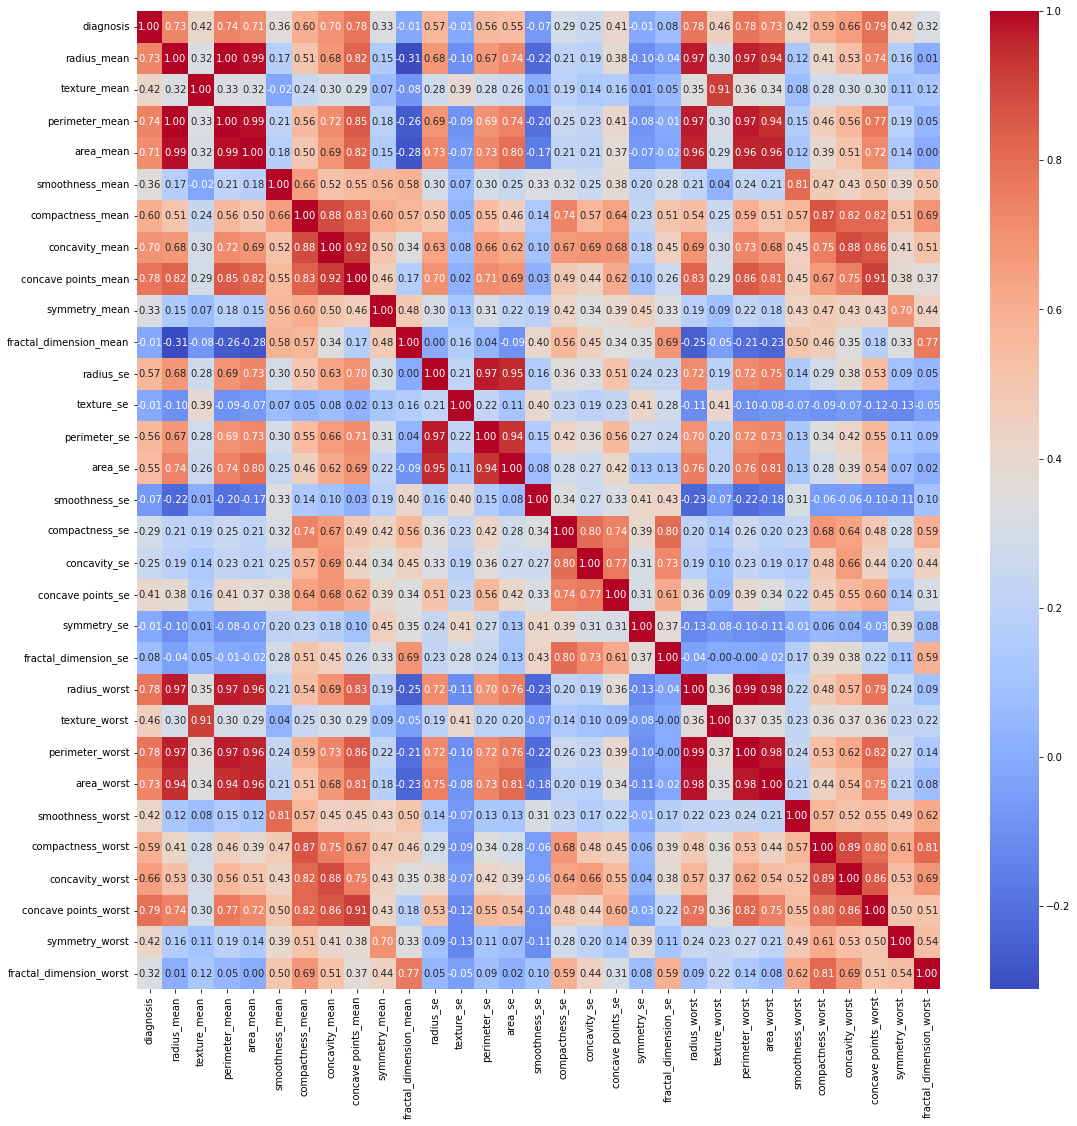

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f');

Text(0.5, 1.0, 'Diagnosis Vs concavity_mean')

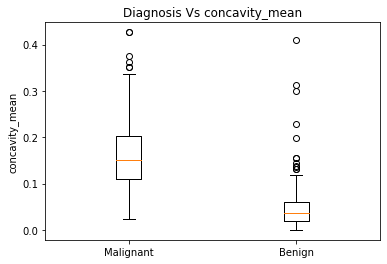

In [10]:
plt.boxplot([df[df['diagnosis']==1]['concavity_mean'], df[df['diagnosis']!=1]['concavity_mean']], labels = ["Malignant", "Benign"])
plt.ylabel('concavity_mean')
plt.title('Diagnosis Vs concavity_mean')

### We see that Malignant masse have a higher concavity size than Benign masses.

<AxesSubplot:ylabel='Frequency'>

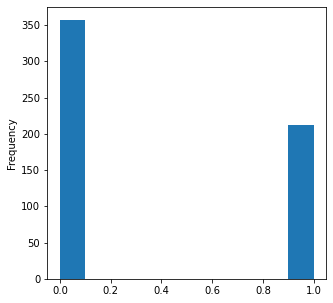

In [11]:
df.diagnosis.plot(kind = 'hist',bins = 10,figsize = (5,5)) 

C:\Users\johnm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

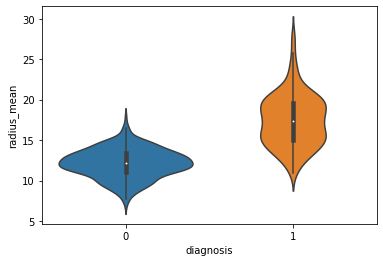

In [12]:
sns.violinplot('diagnosis', 'radius_mean', data= df)

### Selecting the target column

In [21]:
target_col = "diagnosis"
x = df.drop(target_col, axis=1).values
y = df[target_col].values

### Train Test Split

In [22]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Scaling the Data

In [23]:
#Scaling
from sklearn.preprocessing import StandardScaler
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train.shape

(398, 30)

In [25]:
y_train.shape

(398,)

### Installing Torch so we can use a Neural Network. This is required for Neural Networks to run.

In [26]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install --upgrade h5py


Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf

### Building the Artificial Neural Network

In [31]:
# Working on the ANN Model
ann = tf.keras.models.Sequential()

In [32]:
# layer 1
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
# layer 2
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [34]:
# output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [35]:
# Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 665us/step - loss: 39.3524 - accuracy: 0.3819
Epoch 2/100
13/13 [==============================] - 0s 582us/step - loss: 24.5119 - accuracy: 0.3819
Epoch 3/100
13/13 [==============================] - 0s 665us/step - loss: 11.2875 - accuracy: 0.3492
Epoch 4/100
13/13 [==============================] - 0s 499us/step - loss: 6.5162 - accuracy: 0.3040
Epoch 5/100
13/13 [==============================] - 0s 582us/step - loss: 5.5269 - accuracy: 0.1884
Epoch 6/100
13/13 [==============================] - 0s 582us/step - loss: 5.0407 - accuracy: 0.2111
Epoch 7/100
13/13 [==============================] - 0s 582us/step - loss: 4.6765 - accuracy: 0.1734
Epoch 8/100
13/13 [==============================] - 0s 582us/step - loss: 4.2831 - accuracy: 0.1985
Epoch 9/100
13/13 [==============================] - 0s 582us/step - loss: 3.8664 - accuracy: 0.2085
Epoch 10/100
13/13 [==============================] - 0s 499us/step - loss: 3.4443 - acc

### Accuaracy is 92.46% out of 100 Epochs

In [37]:
# Test set
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

### Confusion Matrix

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109   2]
 [  8  52]]


0.9415204678362573

### Classification Report

In [40]:
from sklearn.metrics import classification_report
print('Classification report: \n',classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       111
           1       0.96      0.87      0.91        60

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



## In Conclusion:

### The model performed very well as accuracy was 94% and precision was between 93% and 96%. This is very good and shows the advantage of using a neural network over classification machine learning algorythms. This advantage is why we see neural networks being utilized more often for complex datasets with many features.